In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score

In [2]:
datasets_directory = 'cifar-10-batches-py/'

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_file(file):
    batch = unpickle(file)
    data = batch[b'data']
    labels = batch[b'labels']
    return data, labels

def get_train_df(batches=6):
    data_array = []
    label_array = []
    for i in range(1,batches):
        data, labels = load_file(datasets_directory + f'data_batch_{i}')
        data_array.extend(data)
        label_array.extend(labels)
    return data_array, label_array
        

def get_test_df():
    path = 'cifar-10-batches-py/'
    return load_file(datasets_directory + f'test_batch')

In [3]:
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

X_train, y_train = get_train_df()
X_test, y_test = get_test_df()


In [4]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

X_train_df = X_train_df / 255.0
X_test_df = X_test_df / 255.0

Training data size: 50000
Test data size: 10000


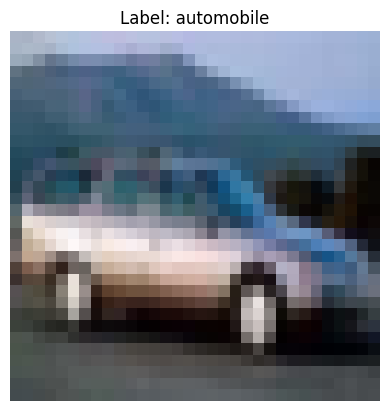

In [5]:
display_id = 4
print("Training data size:", len(X_train))
print("Test data size:", len(X_test))

if len(X_train) != len(y_train):
    raise ValueError('Train data size mismatch')
if len(X_test) != len(y_test):
    raise ValueError('Test data size mismatch')

dataset_size = len(X_train)

if display_id < dataset_size:
    display_img = X_train[display_id]
    display_label = y_train[display_id]
else:
    display_img = X_test[display_id-dataset_size]
    display_label = y_train[display_id-dataset_size]
display_img = display_img.reshape(3, 32, 32)
display_img = np.transpose(display_img, (1, 2, 0))

plt.imshow(display_img)
plt.title(f"Label: {classes[display_label]}")
plt.axis('off')
plt.show()

In [6]:
logistic_model = LogisticRegression(
    max_iter=200,
    n_jobs=-1
)
logistic_model.fit(X_train_df, y_train)

LogisticRegression(max_iter=200, n_jobs=-1)

In [20]:
def metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision_micro = precision_score(y_true, y_pred, average='micro')
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_macro = f1_score(y_true, y_pred, average='macro')

    print("Accuracy:", acc)
    print("Error rate:", 1 - acc)
    print("Precision micro:", precision_micro)
    print("Precision macro:", precision_macro)
    print("Recall micro:", recall_micro)
    print("Recall macro:", recall_macro)
    print("F1 micro:", f1_micro)
    print("F1 macro:", f1_macro)
    
def display_results(MODEL): 
    y2 = MODEL.predict(X_train_df)
    print("TRAIN SCORES:")
    metrics(y_train, y2)
    y_pred = MODEL.predict(X_test_df)
    print("TRAIN SCORES:")
    metrics(y_test, y_pred) 
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=[classes[i] for i in range(10)],
        yticklabels=[classes[i] for i in range(10)]
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

TRAIN SCORES:
Accuracy: 0.4502
Error rate: 0.5498000000000001
Precision micro: 0.4502
Precision macro: 0.44642045812072545
Recall micro: 0.4502
Recall macro: 0.45020000000000004
F1 micro: 0.4502
F1 macro: 0.44716399646474514
TRAIN SCORES:
Accuracy: 0.4074
Error rate: 0.5926
Precision micro: 0.4074
Precision macro: 0.40295077000075324
Recall micro: 0.4074
Recall macro: 0.4074
F1 micro: 0.4074
F1 macro: 0.40406112780816644


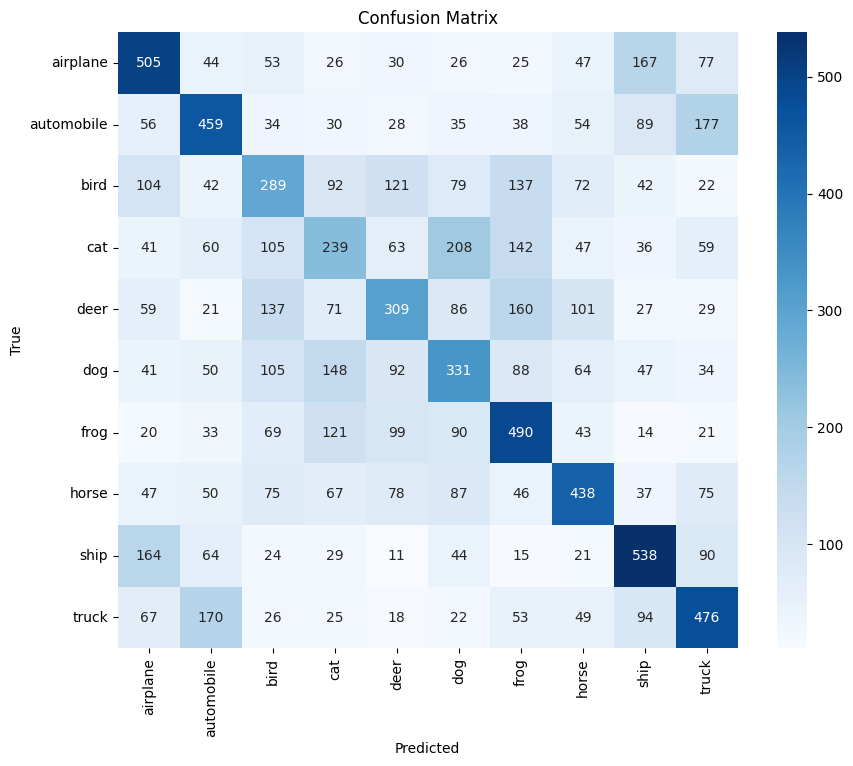

In [21]:
display_results(logistic_model)

In [22]:
nn_model = KNeighborsClassifier()
nn_model.fit(X_train_df, y_train)

KNeighborsClassifier()

TRAIN SCORES:
Accuracy: 0.50534
Error rate: 0.49466
Precision micro: 0.50534
Precision macro: 0.6006182167246272
Recall micro: 0.50534
Recall macro: 0.50534
F1 micro: 0.50534
F1 macro: 0.5005859526695361
TRAIN SCORES:
Accuracy: 0.3398
Error rate: 0.6602
Precision micro: 0.3398
Precision macro: 0.43042618255284965
Recall micro: 0.3398
Recall macro: 0.3398
F1 micro: 0.3398
F1 macro: 0.3260170986061005


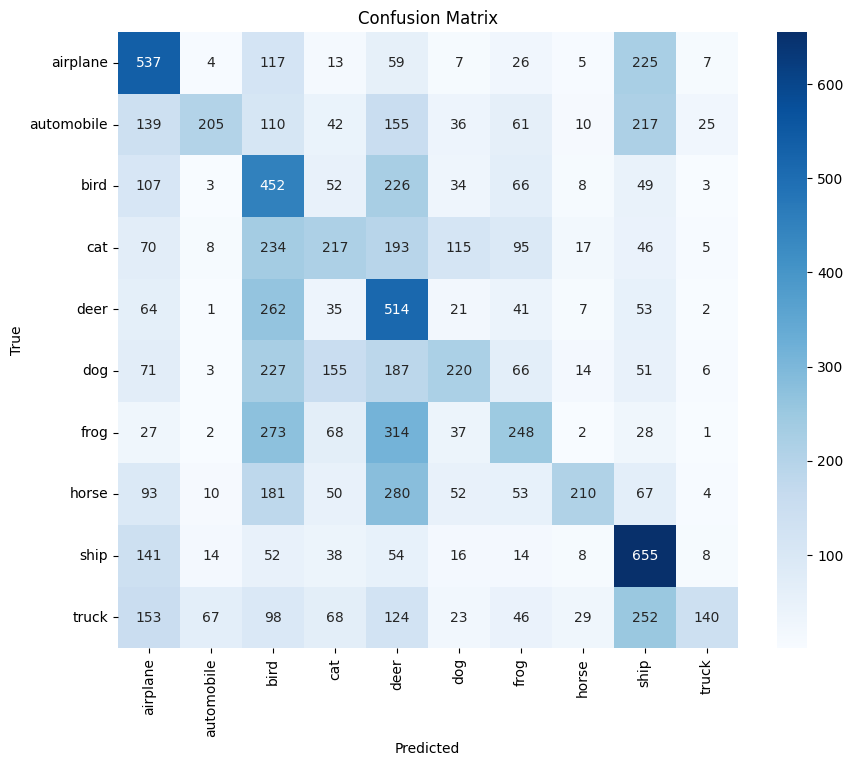

In [23]:
display_results(nn_model)

In [24]:
pca = PCA()
pca = PCA(n_components=256)

X_train_pca = pca.fit_transform(X_train_df)
X_test_pca = pca.transform(X_test_df)

In [25]:
svc_model = LinearSVC()
svc_model.fit(X_train_pca, y_train)

LinearSVC()

TRAIN SCORE:
Accuracy: 0.42226
Error rate: 0.5777399999999999
Precision micro: 0.42226
Precision macro: 0.4158732044343288
Recall micro: 0.42226
Recall macro: 0.42225999999999997
F1 micro: 0.42226
F1 macro: 0.4099935876640253
TEST SCORE:
Accuracy: 0.4055
Error rate: 0.5945
Precision micro: 0.4055
Precision macro: 0.3963463483803178
Recall micro: 0.4055
Recall macro: 0.40549999999999997
F1 micro: 0.4055
F1 macro: 0.39235604064643836


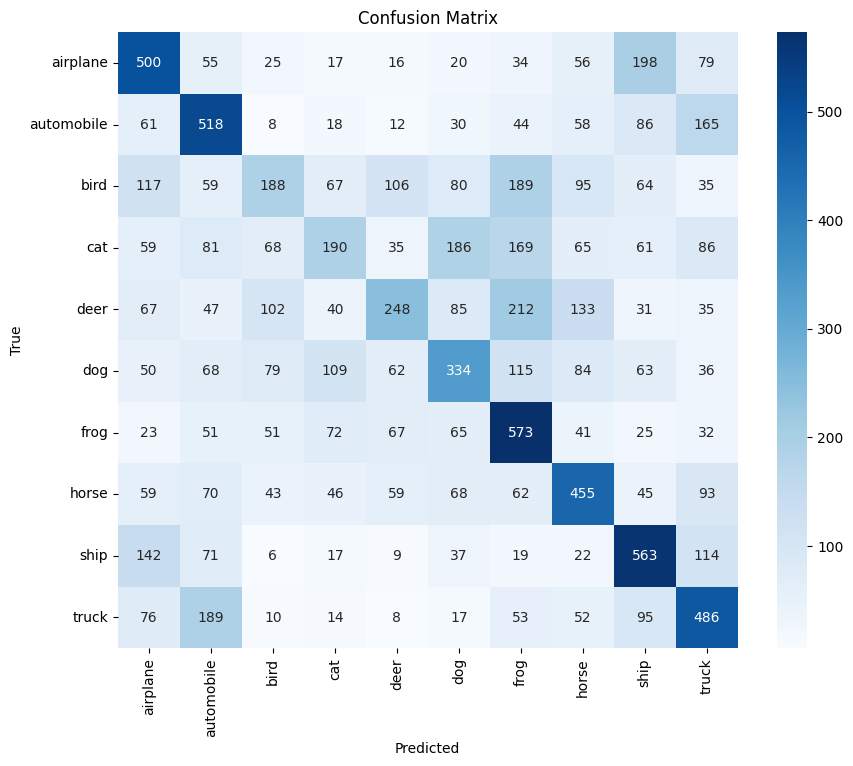

In [27]:
y2 = svc_model.predict(X_train_pca)
print("TRAIN SCORE:")
metrics(y_train, y2)

y_pred = svc_model.predict(X_test_pca)
print("TEST SCORE:")
metrics(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[classes[i] for i in range(10)],
    yticklabels=[classes[i] for i in range(10)]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [28]:
logistic_model_l2 = LogisticRegression(
    max_iter=200,
    n_jobs=-1,
    penalty=None
)
logistic_model_l2.fit(X_train_df, y_train)
y_proba = logistic_model_l2.predict_proba(X_test_df)
loss = log_loss(y_test, y_proba)
print(f"Linear Regression Loss: {loss}")

Linear Regression Loss: 1.7178821341798052
